In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [16]:
!pwd

/Users/rasdani/git/mmteb-wiki/mmteb_wiki


In [21]:
import os

# Path to the directory containing MRR results
mrr_directory = '/Users/rasdani/git/mmteb-wiki/results/germanrag-positives/mrr'

csv_files = [os.path.join(mrr_directory, f) for f in os.listdir(mrr_directory) if f.endswith('.csv')]
print(csv_files)

# Initialize an empty DataFrame
combined_df = pd.DataFrame()

# Iterate through the list of CSV files and concatenate them into a single DataFrame
for file in csv_files:
    data = pd.read_csv(file)
    combined_df = pd.concat([combined_df, data], ignore_index=True)

# Display the combined DataFrame
print(combined_df)


['/Users/rasdani/git/mmteb-wiki/results/germanrag-positives/mrr/thenlper_gte-large.csv', '/Users/rasdani/git/mmteb-wiki/results/germanrag-positives/mrr/jinaai_jina-embeddings-v2-base-de.csv', '/Users/rasdani/git/mmteb-wiki/results/germanrag-positives/mrr/thenlper_gte-small.csv', '/Users/rasdani/git/mmteb-wiki/results/germanrag-positives/mrr/deutsche-telekom_gbert-large-paraphrase-cosine.csv', '/Users/rasdani/git/mmteb-wiki/results/germanrag-positives/mrr/mixedbread-ai_mxbai-embed-large-v1.csv', '/Users/rasdani/git/mmteb-wiki/results/germanrag-positives/mrr/intfloat_multilingual-e5-base.csv', '/Users/rasdani/git/mmteb-wiki/results/germanrag-positives/mrr/thenlper_gte-base.csv', '/Users/rasdani/git/mmteb-wiki/results/germanrag-positives/mrr/deepset_gbert-large.csv', '/Users/rasdani/git/mmteb-wiki/results/germanrag-positives/mrr/intfloat_multilingual-e5-small.csv', '/Users/rasdani/git/mmteb-wiki/results/germanrag-positives/mrr/intfloat_multilingual-e5-large.csv']
                         

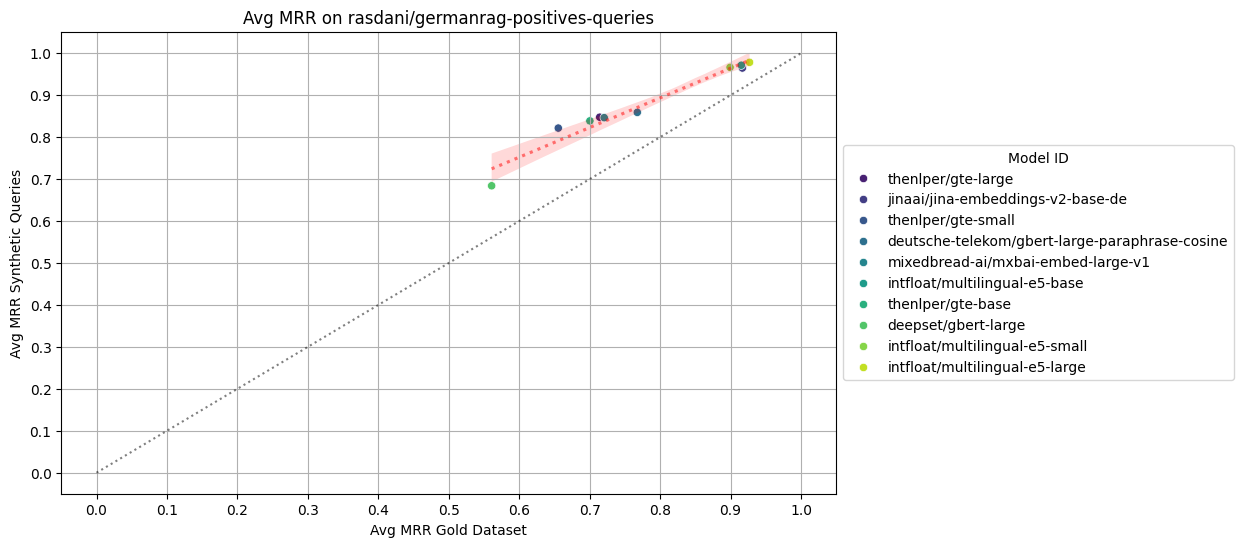

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='MRR Gold Dataset', y='MRR Synthetic Queries', hue='Model ID', palette='viridis')
sns.regplot(data=combined_df, x='MRR Gold Dataset', y='MRR Synthetic Queries', scatter=False, color='red', line_kws={'linestyle': ':', 'alpha': 0.5})
plt.title('Avg MRR on rasdani/germanrag-positives-queries')
plt.xlabel('Avg MRR Gold Dataset')
plt.ylabel('Avg MRR Synthetic Queries')
plt.legend(title='Model ID', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.plot([0, 1], [0, 1], linestyle=':', color='black', alpha=0.5)
plt.show()


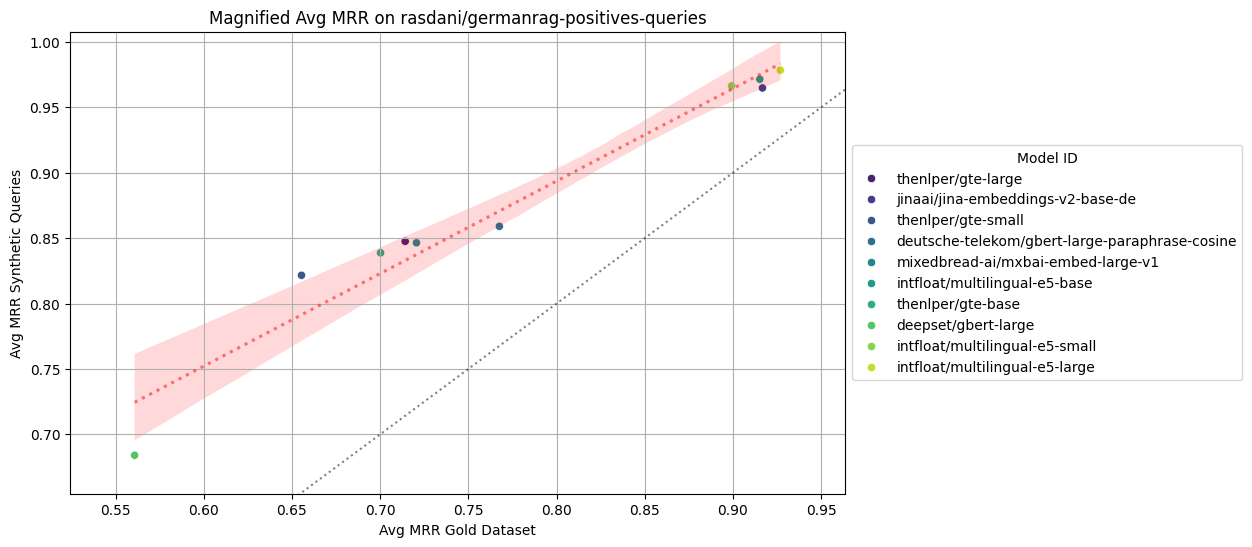

In [41]:
# Determine the range of the data points for magnification
x_min, x_max = combined_df['MRR Gold Dataset'].min(), combined_df['MRR Gold Dataset'].max()
y_min, y_max = combined_df['MRR Synthetic Queries'].min(), combined_df['MRR Synthetic Queries'].max()

# Add a small margin to the range
x_margin = (x_max - x_min) * 0.1
y_margin = (y_max - y_min) * 0.1

# Create the magnified plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='MRR Gold Dataset', y='MRR Synthetic Queries', hue='Model ID', palette='viridis')
sns.regplot(data=combined_df, x='MRR Gold Dataset', y='MRR Synthetic Queries', scatter=False, color='red', line_kws={'linestyle': ':', 'alpha': 0.5})
plt.title('Magnified Avg MRR on rasdani/germanrag-positives-queries')
plt.xlabel('Avg MRR Gold Dataset')
plt.ylabel('Avg MRR Synthetic Queries')
plt.legend(title='Model ID', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.ylim(y_min - y_margin, y_max + y_margin)
plt.plot([0, 1], [0, 1], linestyle=':', color='black', alpha=0.5)
plt.show()
